In [32]:
import pandas as pd

In [33]:
# import csv to df
salary_df1 = pd.read_csv("../imported_data/salary_data1.csv", header=3)
salary_df1.head()


,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,1/5/2017 5:10:20,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,1/5/2017 5:26:23,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,1/5/2017 5:32:57,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,1/5/2017 5:33:03,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,1/5/2017 5:34:34,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [34]:
# take only the columns we need
salary_df1 = salary_df1[["Survey Year", "SalaryUSD", "Country", "EmploymentStatus", "JobTitle", "ManageStaff", "YearsWithThisTypeOfJob", "OtherPeopleOnYourTeam", "Education", "EducationIsComputerRelated", "Certifications", "HoursWorkedPerWeek", "TelecommuteDaysPerWeek", "EmploymentSector"]]
salary_df1


,Survey Year,SalaryUSD,Country,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,2017,200000,United States,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,2017,61515,United Kingdom,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
2,2017,95000,Germany,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business
3,2017,56000,United Kingdom,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,2017,35000,France,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,2019,32000,Hungary,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,2019,32000,Hungary,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,2019,40000,Portugal,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,2019,130000,United States,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [35]:
# check the datatypes to see what needs to be changed
salary_df1.dtypes

Survey Year                    int64
SalaryUSD                     object
Country                       object
EmploymentStatus              object
JobTitle                      object
ManageStaff                   object
YearsWithThisTypeOfJob         int64
OtherPeopleOnYourTeam         object
Education                     object
EducationIsComputerRelated    object
Certifications                object
HoursWorkedPerWeek             int64
TelecommuteDaysPerWeek        object
EmploymentSector              object
dtype: object

In [36]:
# take out non-integer characters in the salary column
salary_df1["SalaryUSD"] = salary_df1["SalaryUSD"].str.replace(",", "")
salary_df1["SalaryUSD"] = salary_df1["SalaryUSD"].str.replace(" ", "")
salary_df1["SalaryUSD"] = salary_df1["SalaryUSD"].str.replace("$", "")
# change the salary type to float
salary_df1["SalaryUSD"] = salary_df1["SalaryUSD"].astype(float)
# check to make sure the salary column is correct data type
salary_df1.dtypes


Survey Year                     int64
SalaryUSD                     float64
Country                        object
EmploymentStatus               object
JobTitle                       object
ManageStaff                    object
YearsWithThisTypeOfJob          int64
OtherPeopleOnYourTeam          object
Education                      object
EducationIsComputerRelated     object
Certifications                 object
HoursWorkedPerWeek              int64
TelecommuteDaysPerWeek         object
EmploymentSector               object
dtype: object

In [37]:
# only take salaries that are greater than 1000 to get rid of low outliers
salary_df1 = salary_df1.loc[salary_df1["SalaryUSD"] > 1000]
salary_df1


,Survey Year,SalaryUSD,Country,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,2017,200000.0,United States,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,2017,61515.0,United Kingdom,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
2,2017,95000.0,Germany,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business
3,2017,56000.0,United Kingdom,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,2017,35000.0,France,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,2019,32000.0,Hungary,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,2019,32000.0,Hungary,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,2019,40000.0,Portugal,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,2019,130000.0,United States,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [38]:
# # take out incorrect/nonsensical data from "YearsWithThisDatabase"
# salary_df1 = salary_df1.loc[(salary_df1["YearsWithThisDatabase"] < 2050)]
# salary_df1 = salary_df1.loc[(salary_df1["YearsWithThisDatabase"] != 1050)]
# salary_df1


In [39]:
# some people entered the year they started instead of amount of years worked in the column "YearsWithThisDatabase"
# this loop takes the year they started and subtracts it from the year they took the survey to get the total yeras worked there
for index, row in salary_df1.iterrows():
    if row[3] > 1000:
        number = row[0] - row[3]
        # print out the number to make sure it worked
        print(number)
        salary_df1.at[index, "YearsWithThisDatabase"] = number

# sort in descending order to make sure numbers in the 2000s don't appear in the "YearsWithThisDatabase" column
salary_df1.sort_values("YearsWithThisDatabase", ascending = False)


TypeError: '>' not supported between instances of 'str' and 'int'

In [40]:
# we only needed the "survey year" column to complete the previous step, so we are removing it now
del salary_df1["Survey Year"]
salary_df1


,SalaryUSD,Country,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,200000.0,United States,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,61515.0,United Kingdom,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
2,95000.0,Germany,Full time employee,Other,Yes,25,2,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business
3,56000.0,United Kingdom,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,35000.0,France,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,32000.0,Hungary,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,32000.0,Hungary,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,40000.0,Portugal,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,130000.0,United States,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [41]:
# remove rows where the job title only has 1-2 entries for that title
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Analytics consultant") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Consultant") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Database Specialist") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Sales") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Sr Consultant ") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Systems Administrator") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Technician ") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Technician ") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Data Scientist") ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['JobTitle'] == "Other") ].index, inplace=True)

salary_df1.drop(salary_df1[(salary_df1['EmploymentStatus'] == "Part time") ].index, inplace=True)

salary_df1.drop(salary_df1[(salary_df1['EmploymentSector'] == "Student") ].index, inplace=True)

salary_df1.drop(salary_df1[(salary_df1['HoursWorkedPerWeek'] > 100) ].index, inplace=True)
salary_df1.drop(salary_df1[(salary_df1['HoursWorkedPerWeek'] < 30) ].index, inplace=True)


salary_df1


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SalaryUSD,Country,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector
0,200000.0,United States,Full time employee,DBA,No,5,2,Masters,No,"Yes, and they're currently valid",45,1,Private business
1,61515.0,United Kingdom,Full time employee,DBA,No,3,1,None (no degree completed),NaN,"No, I never have",35,2,Private business
3,56000.0,United Kingdom,Full time employee,DBA,No,2,None,Associates (2 years),No,"No, I never have",40,1,Private business
4,35000.0,France,Full time employee of a consulting/contracting...,DBA,No,10,None,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business
5,215000.0,United Kingdom,Independent or freelancer or company owner,DBA,No,15,None,Bachelors (4 years),No,"Yes, but they expired",35,"None, or less than 1 day per week",Private business
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,32000.0,Hungary,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6889,32000.0,Hungary,Full time employee,DBA (General - splits time evenly between writ...,No,3,More than 5,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,2,Private business
6890,40000.0,Portugal,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,1,Bachelors (4 years),Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business
6891,130000.0,United States,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,5,Bachelors (4 years),Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business


In [42]:
# group job titles into more organized categories
salary_df1.loc[salary_df1["JobTitle"] == "DBA (Development Focus - tunes queries, indexes, does deployments)", "JobTitle"] = "DBA"
salary_df1.loc[salary_df1["JobTitle"] == "DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)", "JobTitle"] = "DBA"
salary_df1.loc[salary_df1["JobTitle"] == "DBA (Production Focus - build & troubleshoot servers, HA/DR)", "JobTitle"] = "DBA"

salary_df1.loc[salary_df1["JobTitle"] == "DevOps, Sr Software Engineer DBA", "JobTitle"] = "Engineer"
salary_df1.loc[salary_df1["JobTitle"] == "Principal database engineer", "JobTitle"] = "Engineer"

salary_df1.loc[salary_df1["JobTitle"] == "DBA / BI Developer", "JobTitle"] = "Developer"
salary_df1.loc[salary_df1["JobTitle"] == "Developer: App code (C#, JS, etc)", "JobTitle"] = "Developer"
salary_df1.loc[salary_df1["JobTitle"] == "Developer: T-SQL", "JobTitle"] = "Developer"
salary_df1.loc[salary_df1["JobTitle"] == "Developer: Business Intelligence (SSRS, PowerBI, etc)", "JobTitle"] = "Developer"

# salary_df1.loc[salary_df1["EmploymentStatus"] == "Full time employee of a consulting/contracting company", "EmploymentStatus"] = "Full time employee"
# salary_df1.loc[salary_df1["EmploymentStatus"] == "Independent consultant, contractor, freelancer,  or company owner", "EmploymentStatus"] = "Independent Consultant/Freelancer"
# salary_df1.loc[salary_df1["EmploymentStatus"] == "Independent or freelancer or company owner", "EmploymentStatus"] = "Independent Consultant/Freelancer"

salary_df1.loc[salary_df1["EmploymentSector"] == "Federal government", "EmploymentSector"] = "Government"
salary_df1.loc[salary_df1["EmploymentSector"] == "Local government", "EmploymentSector"] = "Government"
salary_df1.loc[salary_df1["EmploymentSector"] == "State/province government", "EmploymentSector"] = "Government"

salary_df1["EmploymentStatus"].value_counts()


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Full time employee                                                   5941
Full time employee of a consulting/contracting company                472
Independent consultant, contractor, freelancer,  or company owner     164
Independent or freelancer or company owner                             93
Name: EmploymentStatus, dtype: int64

In [43]:
# import the country to regions csv
country_to_region_df = pd.read_csv("../imported_data/country_to_region.csv")
country_to_region_df


,Country,Region
0,Canada,North America
1,Russia,Eastern Europe
2,Indonesia,Asia
3,Argentina,Latin America
4,Colombia,Latin America
...,...,...
80,Taiwan,Asia
81,Thailand,Asia
82,Uruguay,South America
83,Venezuela,South America


In [44]:
# merge salary df with county to region df so each row specifies the region as well as country
merged_df = pd.merge(salary_df1, country_to_region_df, on="Country", how="outer")
merged_df


,SalaryUSD,Country,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region
0,200000.0,United States,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America
1,137500.0,United States,Full time employee of a consulting/contracting...,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America
2,85000.0,United States,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America
3,96000.0,United States,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America
4,66000.0,United States,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,51000.0,Taiwan,Full time employee,DBA,No,10.0,More than 5,Masters,Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Asia
6670,NaN,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
6671,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Europe
6672,NaN,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa


In [45]:
del merged_df["Country"]

In [46]:
merged_df = merged_df[:-4]
merged_df


,SalaryUSD,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region
0,200000.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America
1,137500.0,Full time employee of a consulting/contracting...,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America
2,85000.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America
3,96000.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America
4,66000.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,7500.0,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa
6666,22350.0,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America
6667,17333.0,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America
6668,35100.0,Full time employee of a consulting/contracting...,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America


In [47]:
import scipy.stats as sts
import numpy as np

z_score = sts.zscore(merged_df["SalaryUSD"].values)
abs_zscores = np.abs(z_score)
outlier_indexes = np.where(abs_zscores > 3)[0]
outlier_indexes


array([  61,   94,  186,  189,  477,  737, 1116, 1339, 1475, 1586, 1677,
       1929, 2001, 2170, 2326, 2340, 2395, 2663, 2790, 2875, 2930, 2974,
       3063, 3135, 3236, 3246, 3262, 3463, 3548, 3828, 3843, 3914, 4332,
       4759, 4905, 5029, 5143, 5192, 5837, 5840, 5956, 6195, 6199, 6222,
       6478, 6602])

In [48]:
for outlier in outlier_indexes:
    index_of_outlier = merged_df[((merged_df.index == outlier))]
    merged_df.drop(index_of_outlier.index, inplace=True)
    
merged_df


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SalaryUSD,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region
0,200000.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America
1,137500.0,Full time employee of a consulting/contracting...,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America
2,85000.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America
3,96000.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America
4,66000.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,7500.0,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa
6666,22350.0,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America
6667,17333.0,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America
6668,35100.0,Full time employee of a consulting/contracting...,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America


In [49]:
# years_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
# years_bin_names = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40"]
# merged_df["YearsWithThisTypeOfJob"] = pd.cut(merged_df["YearsWithThisTypeOfJob"], years_bins, labels=years_bin_names, include_lowest=True)
# merged_df


In [50]:
# hours_bins = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
# hours_bin_names = ["30-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "81-85", "86-90", "91-95", "96-100"]
# merged_df["HoursWorkedPerWeek"] = pd.cut(merged_df["HoursWorkedPerWeek"], hours_bins, labels=hours_bin_names, include_lowest=True)
# merged_df


In [51]:
salary_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000]
salary_bin_names = [5000, 15000, 25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 105000, 115000, 125000, 135000, 145000, 155000, 165000, 175000, 185000, 195000, 205000, 215000, 225000, 235000, 245000, 255000]
merged_df["AverageSalaryUSD"] = pd.cut(merged_df["SalaryUSD"], salary_bins, labels=salary_bin_names, include_lowest=True)
merged_df


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SalaryUSD,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region,AverageSalaryUSD
0,200000.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America,195000
1,137500.0,Full time employee of a consulting/contracting...,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America,135000
2,85000.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America,85000
3,96000.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America,95000
4,66000.0,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,7500.0,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa,5000
6666,22350.0,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America,25000
6667,17333.0,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America,15000
6668,35100.0,Full time employee of a consulting/contracting...,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America,35000


In [52]:
del merged_df["SalaryUSD"]
merged_df


,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Region,AverageSalaryUSD
0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America,195000
1,Full time employee of a consulting/contracting...,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America,135000
2,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America,85000
3,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America,95000
4,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa,5000
6666,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America,25000
6667,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America,15000
6668,Full time employee of a consulting/contracting...,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America,35000


In [53]:
# rename all column headers to be lowercase to fit postgres format
merged_df.columns = map(str.lower, merged_df.columns)
merged_df


,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region,averagesalaryusd
0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America,195000
1,Full time employee of a consulting/contracting...,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America,135000
2,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America,85000
3,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America,95000
4,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa,5000
6666,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America,25000
6667,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America,15000
6668,Full time employee of a consulting/contracting...,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America,35000


In [54]:
# makes a column called id to be used as the primary key
merged_df = merged_df.reset_index()
merged_df = merged_df.rename(columns={"index":"id"})
merged_df


,id,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region,averagesalaryusd
0,0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America,195000
1,1,Full time employee of a consulting/contracting...,DBA,No,6.0,4,None (no degree completed),NaN,"Yes, and they're currently valid",55.0,5 or more,Private business,North America,135000
2,2,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America,85000
3,3,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America,95000
4,4,Full time employee,Developer,No,10.0,None,Associates (2 years),NaN,"No, I never have",60.0,5 or more,Private business,North America,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,6665,Full time employee,Developer,Yes,8.0,2,Associates (2 years),Yes,"Yes, but they expired",40.0,"None, or less than 1 day per week",Private business,Africa,5000
6620,6666,Full time employee,DBA,No,1.0,3,None (no degree completed),NaN,"No, I never have",44.0,"None, or less than 1 day per week",Private business,North America,25000
6621,6667,Full time employee,DBA,Yes,7.0,2,Bachelors (4 years),Yes,"No, I never have",35.0,5 or more,Private business,South America,15000
6622,6668,Full time employee of a consulting/contracting...,DBA,No,1.0,2,Bachelors (4 years),Yes,"Yes, and they're currently valid",44.0,"None, or less than 1 day per week",Private business,South America,35000


In [55]:
# get list of columns to make postgresql schema
merged_df.keys()


Index(['id', 'employmentstatus', 'jobtitle', 'managestaff',
       'yearswiththistypeofjob', 'otherpeopleonyourteam', 'education',
       'educationiscomputerrelated', 'certifications', 'hoursworkedperweek',
       'telecommutedaysperweek', 'employmentsector', 'region',
       'averagesalaryusd'],
      dtype='object')

In [56]:
# get data types of columns to make postgresql schema
merged_df.dtypes


id                               int64
employmentstatus                object
jobtitle                        object
managestaff                     object
yearswiththistypeofjob         float64
otherpeopleonyourteam           object
education                       object
educationiscomputerrelated      object
certifications                  object
hoursworkedperweek             float64
telecommutedaysperweek          object
employmentsector                object
region                          object
averagesalaryusd              category
dtype: object

In [57]:
# load the cleaned df to a csv
merged_df.to_csv("../exported_data/salary_data1.csv")


In [424]:
# Configure settings for RDS
from config import sandy_RDS_username
from config import sandy_RDS_password
from config import sandy_RDS_endpoint
from sqlalchemy import create_engine

rds_connection_string = f'{sandy_RDS_username}:{sandy_RDS_password}@{sandy_RDS_endpoint}:5432/predict_salary_db'
engine = create_engine(f'postgresql://{rds_connection_string}')


In [406]:
# check that connection worked
engine.table_names()


['salary_data1']

In [129]:
# adds dataframe to RDS
merged_df.to_sql(name='salary_data1', con=engine, if_exists='append', index=False)


In [130]:
# Check to confirm that data was loaded successfully
pd.read_sql_query('select * from salary_data1', con=engine)


,id,salaryusd,country,primarydatabase,yearswiththisdatabase,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,databaseservers,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region
0,0,200000,United States,Microsoft SQL Server,10,Full time employee,DBA,No,5,2,350,Masters,No,"Yes, and they're currently valid",45,1,Private business,North America
1,1,137500,United States,Microsoft SQL Server,16,Full time employee,DBA,No,6,4,200,None (no degree completed),None,"Yes, and they're currently valid",55,5 or more,Private business,North America
2,2,85000,United States,Microsoft SQL Server,8,Full time employee,DBA,No,2,None,15,Bachelors (4 years),Yes,"No, I never have",50,"None, or less than 1 day per week",Private business,North America
3,3,96000,United States,Microsoft SQL Server,5,Full time employee,DBA,No,5,None,100,Masters,No,"No, I never have",45,1,Private business,North America
4,4,66000,United States,Microsoft SQL Server,10,Full time employee,Developer,No,10,None,4,Associates (2 years),None,"No, I never have",60,5 or more,Private business,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6642,6688,7500,Ghana,Microsoft SQL Server,4,Full time employee,Developer,Yes,8,2,2,Associates (2 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business,Africa
6643,6689,22350,Dominican Republic,Microsoft SQL Server,11,Full time employee,DBA,No,1,3,46,None (no degree completed),None,"No, I never have",44,"None, or less than 1 day per week",Private business,North America
6644,6690,17333,Uruguay,Microsoft SQL Server,7,Full time employee,DBA,Yes,7,2,20,Bachelors (4 years),Yes,"No, I never have",35,5 or more,Private business,South America
6645,6691,35100,Guatemala,Microsoft SQL Server,1,Full time employee,DBA,No,1,2,170,Bachelors (4 years),Yes,"Yes, and they're currently valid",44,"None, or less than 1 day per week",Private business,South America


Text(0.5, 1.015, 'Distribution of Salaries')

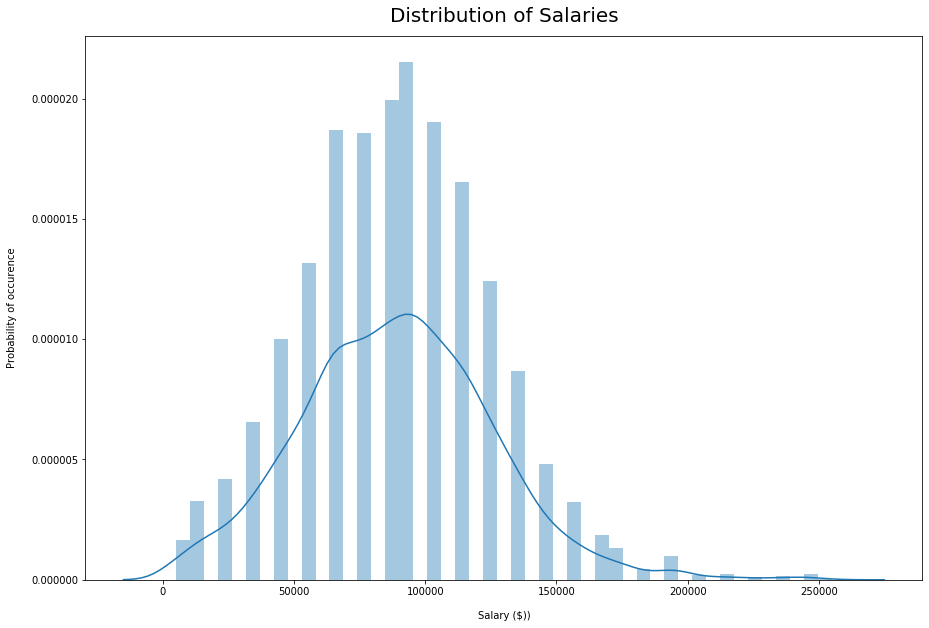

In [425]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of data
plt.figure(figsize=(15,10)) 
sns.distplot(merged_df["averagesalaryusd"])
plt.xlabel("Salary ($))", labelpad=14)
plt.ylabel("Probability of occurence", labelpad=14)
plt.title("Distribution of Salaries", y=1.015, fontsize=20)
